<a href="https://colab.research.google.com/github/RPeleja/FAI24_G01/blob/main/Project02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import the libraries

The following code imports the required library for EDA.

In [26]:
# Change Root directory
%cd /content/drive/MyDrive/Colab Notebooks/FA/Project02

# import kagglehub
# # Download latest version
# path = kagglehub.dataset_download("andresionek/data-jobs-listings-glassdoor")
# print("Path to dataset files:", path)

import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/FA/')

from Project02.Utils import load_dataframe_from_csv

import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline
sns.set(color_codes=True)

/content/drive/MyDrive/Colab Notebooks/FA/Project02


In [3]:
# Dataset File Path
filePath = "DataSet/DataAnalyst.csv"

### Variable description

In [33]:
df = pd.read_csv(filePath)
# To display the top 5 rows
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [34]:
# Check the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2253 non-null   int64  
 1   Job Title          2253 non-null   object 
 2   Salary Estimate    2253 non-null   object 
 3   Job Description    2253 non-null   object 
 4   Rating             2253 non-null   float64
 5   Company Name       2252 non-null   object 
 6   Location           2253 non-null   object 
 7   Headquarters       2253 non-null   object 
 8   Size               2253 non-null   object 
 9   Founded            2253 non-null   int64  
 10  Type of ownership  2253 non-null   object 
 11  Industry           2253 non-null   object 
 12  Sector             2253 non-null   object 
 13  Revenue            2253 non-null   object 
 14  Competitors        2253 non-null   object 
 15  Easy Apply         2253 non-null   object 
dtypes: float64(1), int64(2),

In [35]:
# Find the different datatypes of the car data DataFrame
df.dtypes

,0
Unnamed: 0,int64
Job Title,object
Salary Estimate,object
Job Description,object
Rating,float64
Company Name,object
Location,object
Headquarters,object
Size,object
Founded,int64


In [36]:
# Check for missing values
df.isnull().sum()


,0
Unnamed: 0,0
Job Title,0
Salary Estimate,0
Job Description,0
Rating,0
Company Name,1
Location,0
Headquarters,0
Size,0
Founded,0


In [37]:
# Display basic statistics
df.describe(include='all')

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,2253.0000,2253,2253,2253,2253.000000,2252,2253,2253,2253,2253.000000,2253,2253,2253,2253,2253,2253
unique,NaN,1272,90,2253,NaN,1513,253,483,9,NaN,15,89,25,14,291,2
top,NaN,Data Analyst,$42K-$76K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,NaN,"Staffigo Technical Services, LLC\n5.0","New York, NY","New York, NY",51 to 200 employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,NaN,405,57,1,NaN,58,310,206,421,NaN,1273,353,570,615,1732,2173
mean,1126.0000,NaN,NaN,NaN,3.160630,NaN,NaN,NaN,NaN,1398.522858,NaN,NaN,NaN,NaN,NaN,NaN
std,650.5294,NaN,NaN,NaN,1.665228,NaN,NaN,NaN,NaN,901.929251,NaN,NaN,NaN,NaN,NaN,NaN
min,0.0000,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,563.0000,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1126.0000,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1689.0000,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


Transform Data

In [41]:
# Remove unnecessary characters and split the salary ranges
def extract_salary_range(salary):
    if pd.isnull(salary):
        return np.nan, np.nan  # Handle missing values

    # Remove unwanted characters
    salary = salary.replace('(Glassdoor est.)', '').replace('$', '').replace('K', '').strip()

    # Split into min and max salary
    salary_split = salary.split('-')

    # Convert to numeric and multiply by 1000 (as it's represented in 'K')
    try:
        min_salary = int(salary_split[0].strip()) * 1000
        max_salary = int(salary_split[1].strip()) * 1000
    except (IndexError, ValueError):
        return np.nan, np.nan  # Handle unexpected formats

    return min_salary, max_salary

# Apply the function to create new columns
df['Min Salary'], df['Max Salary'] = zip(*df['Salary Estimate'].apply(extract_salary_range))

# Check the new columns
df[['Salary Estimate', 'Min Salary', 'Max Salary']].head()

,Salary Estimate,Min Salary,Max Salary
0,$37K-$66K (Glassdoor est.),37000.0,66000.0
1,$37K-$66K (Glassdoor est.),37000.0,66000.0
2,$37K-$66K (Glassdoor est.),37000.0,66000.0
3,$37K-$66K (Glassdoor est.),37000.0,66000.0
4,$37K-$66K (Glassdoor est.),37000.0,66000.0


### Univariate Variable Analysis - Categorical Variables

In [42]:
# # Get the categorical variables from df
# categorical_features = [feature for feature in df.columns if df[feature].dtype == object]
# print(categorical_features)

['Job Title', 'Salary Estimate', 'Job Description', 'Company Name', 'Location', 'Headquarters', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors', 'Easy Apply']


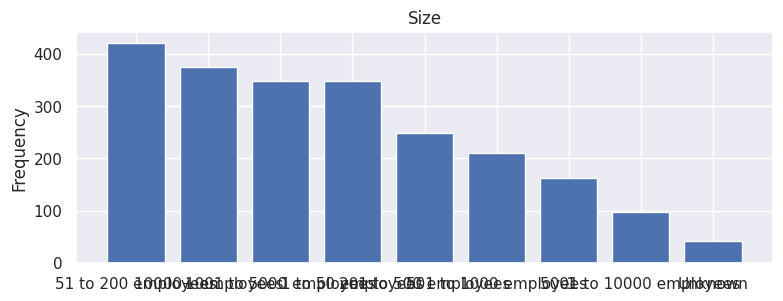

Size: 
 Size
51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
-1                         163
5001 to 10000 employees     97
Unknown                     42
Name: count, dtype: int64


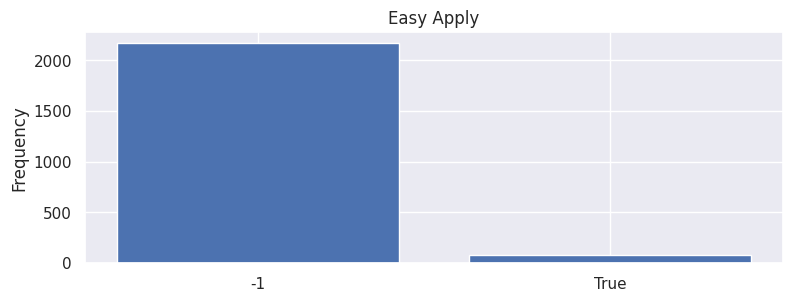

Easy Apply: 
 Easy Apply
-1      2173
True      80
Name: count, dtype: int64


In [43]:
# def bar_plot(variable):
#     """
#         input: variable ex: "Location"
#         output: bar plot & value count
#     """
#     # get feature
#     var = df[variable]
#     # count number of categorical variable(value/sample)
#     varValue = var.value_counts()

#     # visualize
#     plt.figure(figsize = (9,3))
#     plt.bar(varValue.index, varValue)
#     plt.xticks(varValue.index, varValue.index.values)
#     plt.ylabel("Frequency")
#     plt.title(variable)
#     plt.show()
#     print("{}: \n {}".format(variable,varValue))


# # Plot categorial_features with less than 10 distinct values
# for cf in categorical_features:
#   if df[cf].nunique() < 10:
#     bar_plot(cf)

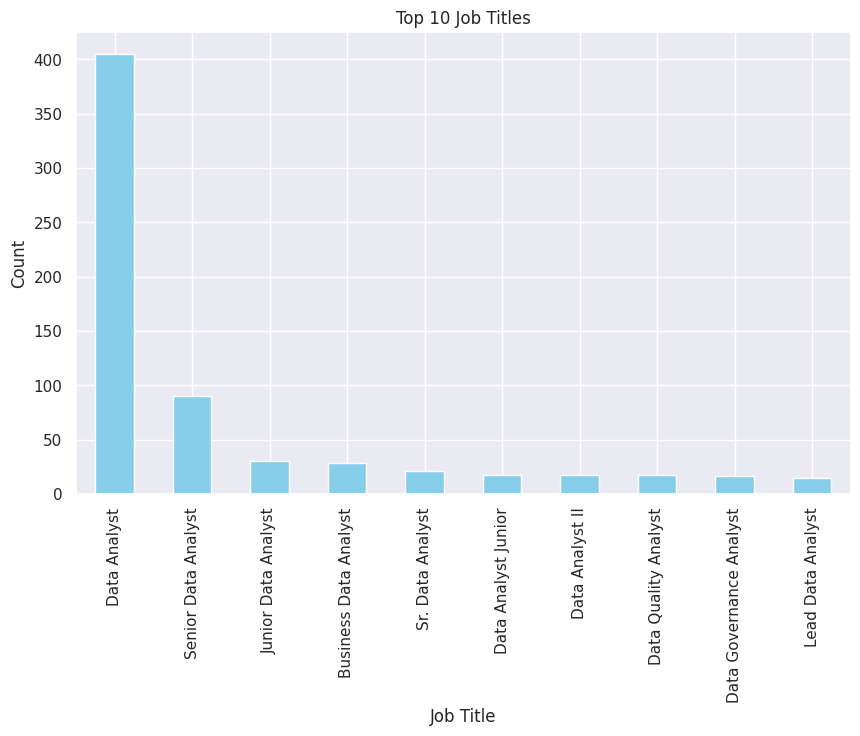

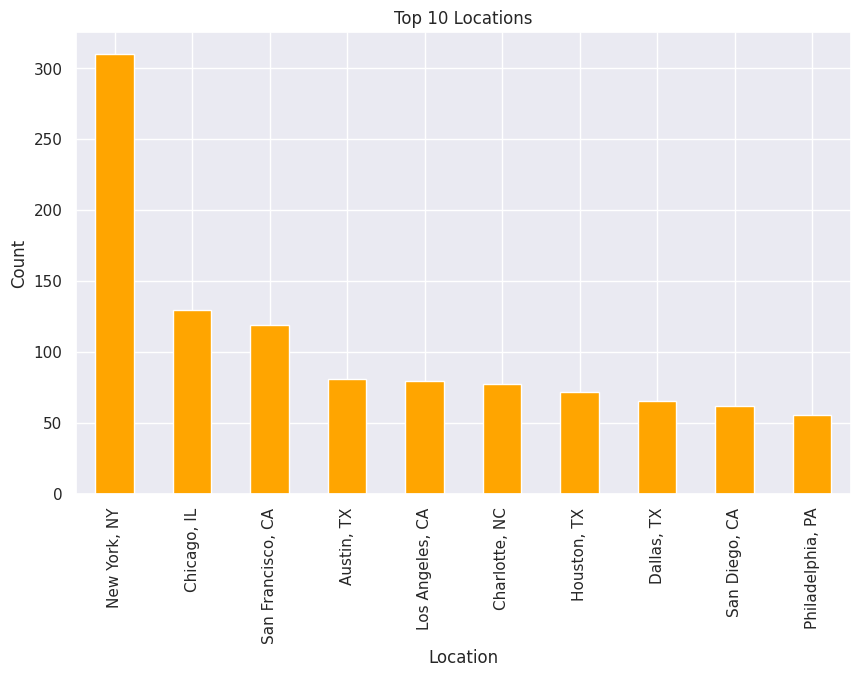

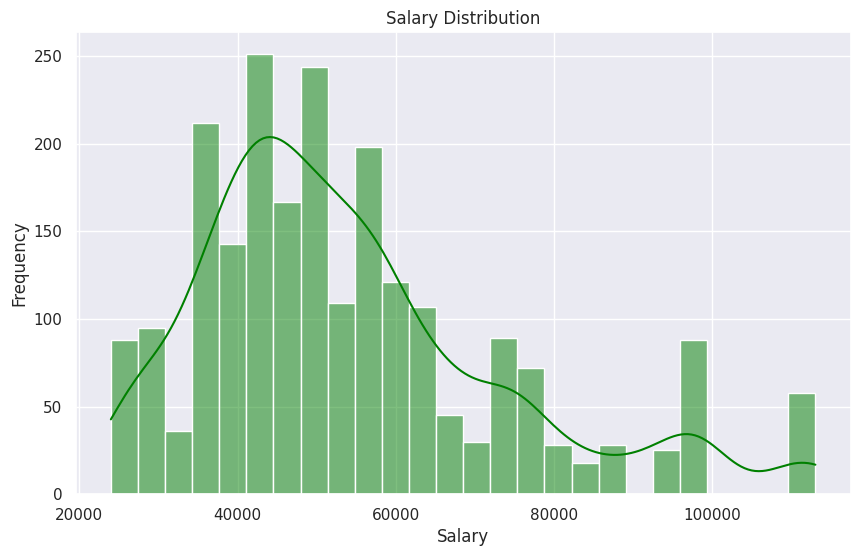

In [45]:

# Top 10 job titles
plt.figure(figsize=(10, 6))
df['Job Title'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Job Titles')
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.show()

# Top 10 locations
plt.figure(figsize=(10, 6))
df['Location'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

# Salary distribution (if available)
if 'Min Salary' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Min Salary'], kde=True, color='green')
    plt.title('Salary Distribution')
    plt.xlabel('Salary')
    plt.ylabel('Frequency')
    plt.show()

In [46]:

def main():
  #print(f"filePath {filePath}")
  # load the dataset
  # input_data = load_dataframe_from_csv(filePath)
  #input_data = pd.read_csv(filePath)

  # Perform EDA

  # Unique job titles
  print(df['Job Title'].value_counts().head(10))

  # Top job locations
  print(df['Location'].value_counts().head(10))

  # Analyze salary distributions (if available)
  if 'Salary' in df.columns:
      df['Salary'].describe()

  # Analyze company counts
  print(df['Company Name'].value_counts().head(10))

  # Skills analysis (if available)
  if 'Skills' in df.columns:
      print(df['Skills'].value_counts().head(10))

if __name__ == "__main__":
  main()


Job Title
Data Analyst               405
Senior Data Analyst         90
Junior Data Analyst         30
Business Data Analyst       28
Sr. Data Analyst            21
Data Analyst Junior         17
Data Analyst II             17
Data Quality Analyst        17
Data Governance Analyst     16
Lead Data Analyst           15
Name: count, dtype: int64
Location
New York, NY         310
Chicago, IL          130
San Francisco, CA    119
Austin, TX            81
Los Angeles, CA       80
Charlotte, NC         78
Houston, TX           72
Dallas, TX            66
San Diego, CA         62
Philadelphia, PA      56
Name: count, dtype: int64
Company Name
Staffigo Technical Services, LLC\n5.0    58
Diverse Lynx\n3.9                        22
Kforce\n4.1                              19
Lorven Technologies Inc\n4.0             19
Robert Half\n3.5                         14
Avacend, Inc.\n2.5                       13
Mondo\n3.9                               11
Apex Systems\n3.8                        10
Appl